In [48]:
# (a) import
library(readr)
library(dplyr)
raw_data <- read.csv("testing_covid.csv")

In [49]:
# (b)
head(raw_data)
# scales and types
# country: qualitative, discrete, nominal
# country_code: qualitative, discrete, nominal
# year_week: quantiative, discrete, intervall
# level: qualitative, discrete, nominal
# region: qualitative, discrete nominal
# region_name: qualitative, discrete nominal
# new_cases: quantitative, discrete, absolute
# tests_done: quantitative, discrete, abosolute
# population: quantitative, discrete, absolute
# testing_rate: quantitative, continious, absolute
# positivity_rate: quantitative, continious, absolute
# testint_data_soiruce: qualitative, discrete, nominal

,X...country,country_code,year_week,level,region,region_name,new_cases,tests_done,population,testing_rate,positivity_rate,testing_data_source
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,Austria,AT,2020-W15,national,AT,Austria,1954,12339,8901064,138.6239,15.8359673,Manual webscraping
2,Austria,AT,2020-W16,national,AT,Austria,773,58488,8901064,657.0900,1.3216386,Manual webscraping
3,Austria,AT,2020-W17,national,AT,Austria,479,33443,8901064,375.7191,1.4322878,Manual webscraping
4,Austria,AT,2020-W18,national,AT,Austria,349,26598,8901064,298.8182,1.3121287,Country website
5,Austria,AT,2020-W19,national,AT,Austria,249,42153,8901064,473.5726,0.5907053,Country website
6,Austria,AT,2020-W20,national,AT,Austria,367,46001,8901064,516.8034,0.7978087,Country website


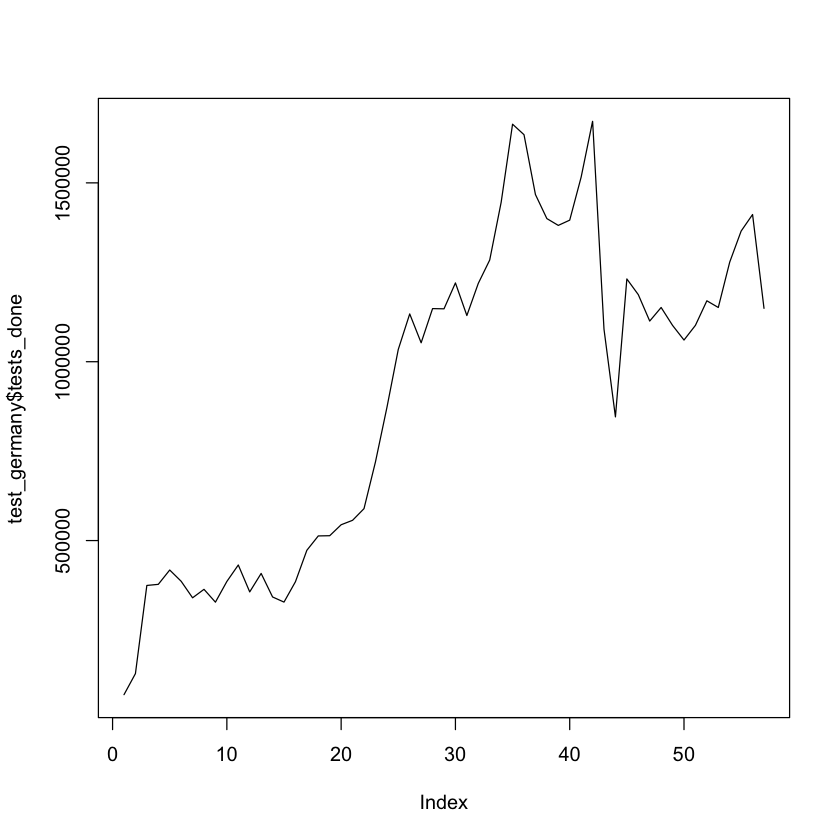

In [50]:
# (c)
test_germany <- raw_data %>%
  filter(country_code == "DE") %>%
  select(year_week, tests_done)
plot(test_germany$tests_done, type = "l")

In [51]:
# raw_data %>% filter(country_code == 'IT') %>%  group_by(level)

country_code,sum_of_tests
<chr>,<int>
AT,1444506
DE,6519962
FR,15876101
IT,10702432


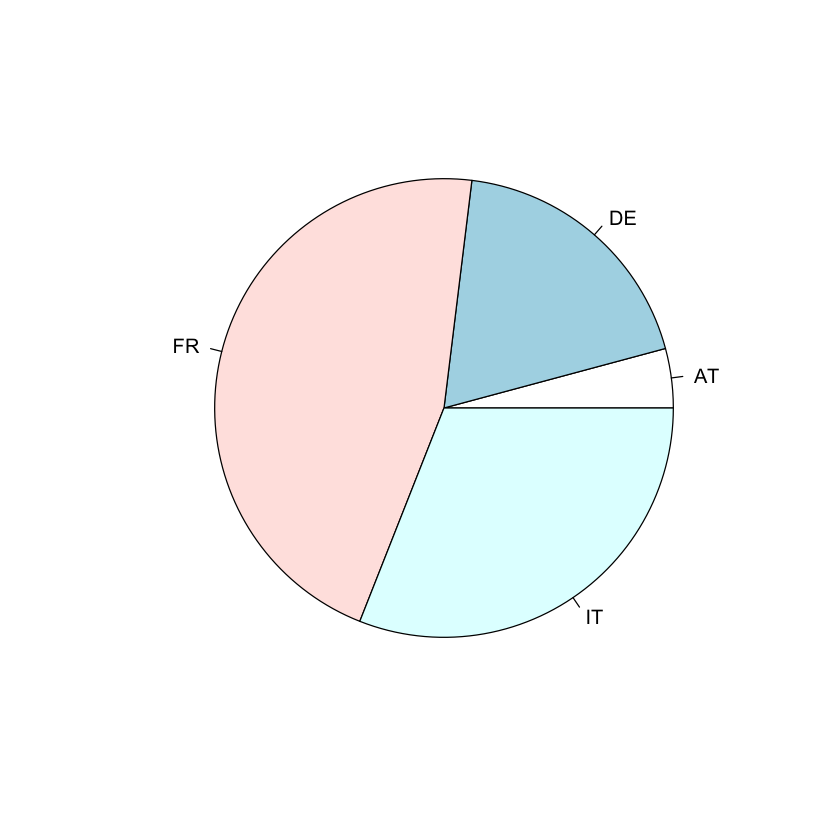

In [59]:
# (d)
sum_of_tests <- raw_data %>%
  filter(country_code %in% c("DE", "AT", "FR", "IT")) %>%
  filter(year_week >= "2020-W49" & year_week <= "2020-W53") %>%
  #filter(level == "national") %>%
  #group_by(level) %>%
  group_by(country_code) %>%
  summarise(sum_of_tests = sum(tests_done))
sum_of_tests

pie(sum_of_tests$sum_of_tests, labels = sum_of_tests$country_code)

country_code,min,max,q1,q2,q3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DE,83.187130,2010.459,502.1793,1311.068,1467.269
FR,4.928683,5265.588,324.5102,1267.803,2826.361


,X...country,country_code,year_week,level,region,region_name,new_cases,tests_done,population,testing_rate,positivity_rate,testing_data_source
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,France,FR,2020-W09,national,FR,France,118,3318,67320216,4.928683,3.556359,TESSy
2,France,FR,2020-W10,national,FR,France,996,11101,67320216,16.489846,8.972165,TESSy
3,France,FR,2020-W11,national,FR,France,4297,29623,67320216,44.003127,14.505621,TESSy
4,France,FR,2020-W12,national,FR,France,10595,73235,67320216,108.786044,14.467126,TESSy
5,France,FR,2020-W13,national,FR,France,24156,122870,67320216,182.515754,19.659803,TESSy
6,France,FR,2020-W14,national,FR,France,30304,127029,67320216,188.693690,23.855970,TESSy


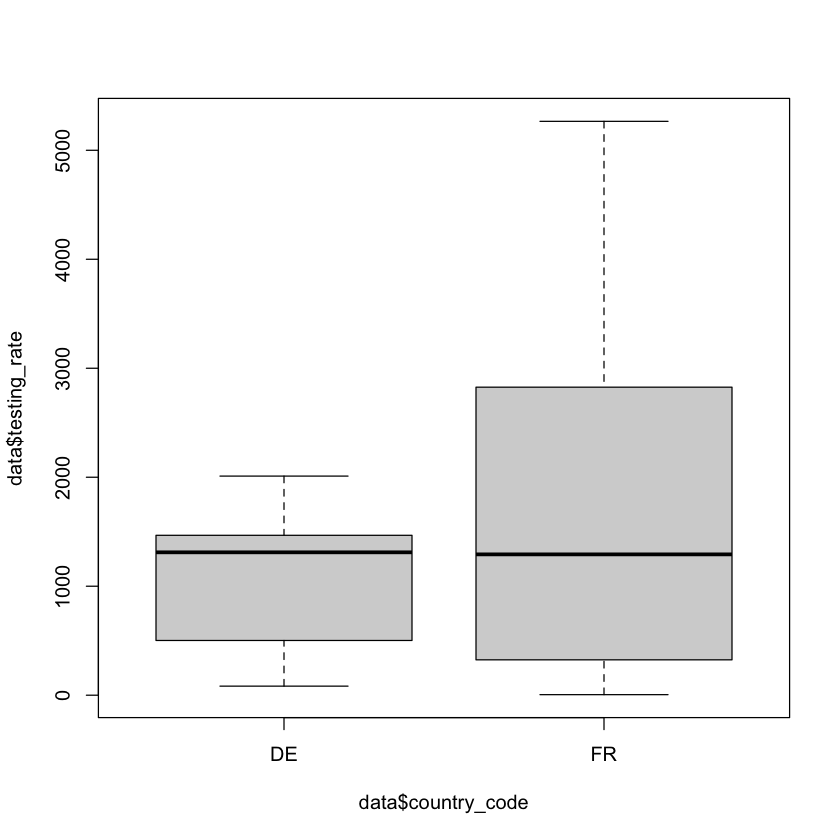

In [65]:
# (e)
# quartiles of testing_rate
measures_testingrate <- raw_data %>%
  filter(country_code %in% c("DE", "FR"), level == "national") %>%
  group_by(country_code) %>%
  summarise(
    min = min(testing_rate),
    max = max(testing_rate),
    q1 = quantile(testing_rate, 0.25, type = 1),
    q2 = quantile(testing_rate, 0.5, type = 1),
    q3 = quantile(testing_rate, 0.75, type = 1)
  )
head(measures_testingrate)

# side by side boxplot
data <- raw_data %>%
  filter(country_code %in% c("DE", "FR"), level == "national")
head(data)

boxplot(data$testing_rate ~ data$country_code)

In [68]:
# # (d)
# sum_of_tests <- raw_data %>%
#   filter(year_week >= "2020-W50") %>%
#   filter(country_code %in% c("DE", "AT", "FR", "IT")) %>%
#   filter(year_week >= "2020-W49" & year_week <= "2020-W53") %>%
#   filter(level == "national") %>%
#   group_by(level) %>%
#   summarise(sum_tests_done = sum(tests_done))
# sum_of_tests$sum_tests_done

[1] 17830388

In [ ]:
# sum_of_tests <- sum_of_tests %>%
#   group_by(country_code) %>%
#   summarise(sum_new_cases = sum(new_cases), sum_tests_done = sum(tests_done))
# sum_of_tests

In [70]:
# Step 1: Sort the data by year and week
sorted_data <- raw_data %>%
  filter(country_code == "DE") %>%
  arrange(year_week)

In [71]:
# Step 2: Assign row numbers as the time variable
sorted_data <- sorted_data %>%
  mutate(time = row_number())

In [72]:
# Step 3: Perform linear regression
lm_model <- lm(tests_done ~ time, data = sorted_data)

In [76]:
# Step 4: Determine regression coefficients
intercept <- coef(lm_model)[1]
slope <- coef(lm_model)[2]
intercept
slope

(Intercept) 
     250383

time 
22557.44

In [74]:
# Step 5: Make predictions for week 20 in 2021
week_20_2021 <- data.frame(time = which(sorted_data$year == 2021 & sorted_data$week == 20))
predicted_tests <- predict(lm_model, newdata = week_20_2021)

In [75]:
# Step 6: Evaluate the goodness of the linear regression
summary(lm_model)


Call:
lm(formula = tests_done ~ time, data = sorted_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-397181 -167490  -90319  243109  624099 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   250383      67980   3.683 0.000527 ***
time           22557       2039  11.064 1.32e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 253200 on 55 degrees of freedom
Multiple R-squared:   0.69,	Adjusted R-squared:  0.6843 
F-statistic: 122.4 on 1 and 55 DF,  p-value: 1.32e-15


In [77]:
# Regression Coefficients:
# The regression equation for predicting tests_done in Germany is:
# tests_done = 250383 + 22557 * time #nolint
# Here, the intercept (a) is approximately 250383, and the coefficient for time
# (b) is approximately 22557.
#
# Prediction for Week 20 in 2021:
# To make a prediction for week 20 in 2021, we need to substitute the
# corresponding time value into the regression equation. Since time corresponds
# to the row number in the sorted data, we need to find the row number for week
# 20 in 2021. Unfortunately, the specific row number for week 20 in 2021 is not
# provided in the output. We would need to locate this row number in the sorted
# data and use it to predict the tests_done.
#
# Goodness of the Linear Regression:
# The multiple R-squared value is 0.69, indicating that approximately 69% of the
# variance in tests_done can be explained by the linear relationship with time.
# The Adjusted R-squared value, which accounts for the number of predictors in
# the model, is 0.6843. The F-statistic is 122.4 with a p-value of approximately
# 1.32e-15, indicating that the overall regression model is statistically
# significant. Additionally, both the intercept and the coefficient for time are
# statistically significant (p-values < 0.05), suggesting that there is a
# significant linear relationship between time and tests_done in Germany.
